In [2]:
import pytc
%matplotlib inline

# libraries for making pretty sliders
from IPython.html import widgets
from IPython.html.widgets import interactive
from IPython.display import display


class Interface:
    
    def __init__(self,fitter):
        """
        """
        
        self._global_sliders = {}
        self._local_sliders = []
        self._fitter = fitter
        self._experiments = [] 
    
    def add_experiment(self,expt):
        
        self._fitter.add_experiment(expt)
        self._experiments.append(expt)
        
    
    def build_interface(self):
        """
        """
    
        global_param, local_param = self._fitter.param_names
        global_guesses, local_guesses = self._fitter.param_guesses
        global_ranges, local_ranges = self._fitter.param_ranges
        global_fixed, local_fixed = self._fitter.fixed_param 
        
        all_widgets = {}
        for p in global_param:
        
            g_min = global_ranges[p][0]
            g_max = global_ranges[p][1]
            g_val = global_guesses[p]
            
            self._global_sliders[p] = widgets.FloatSlider(min=g_min,max=g_max,value=g_val)
            
            all_widgets["{}".format(p)] = self._global_sliders[p]
    
        for i in range(len(self._experiments)):            
            
            self._local_sliders.append({})
        
            for p in local_param[i]:
            
                g_min = local_ranges[i][p][0]
                g_max = local_ranges[i][p][1]
                g_val = local_guesses[i][p]
                
                self._local_sliders[-1][p] = widgets.FloatSlider(min=g_min,max=g_max,value=g_val)
        
                all_widgets["{},{}".format(p,i)] = self._local_sliders[-1][p]
            
        w = widgets.interactive(self._update,**all_widgets)
                        
        display(w)
        
        btn = widgets.Button(description="Show Fit")
        btn.on_click(self.get_param)
        display(btn)

    def _update(self,**kwargs):
        """
        """
        
        for k in kwargs.keys():
            if len(k.split(",")) == 1:
                self._fitter.update_guess(k,kwargs[k])
            else:
                
                param_name = k.split(",")[0]
                expt = self._experiments[int(k.split(",")[1])]
                self._fitter.update_guess(param_name,kwargs[k],expt)
       
        self._fitter.fit()
        self._fitter.plot()
        
    def get_param(self):
        
        
        print(self._fitter.fit_param)

    


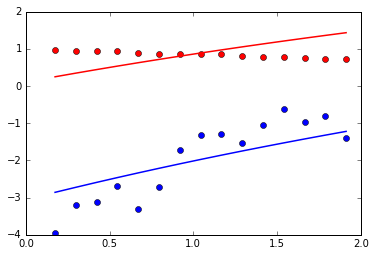

In [3]:
        
f = pytc.GlobalFit()
gui = Interface(f)

e1 = pytc.ITCExperiment("test-data/blank.DH",pytc.models.Blank)
e2 = pytc.ITCExperiment("test-data/real-blank-match.DH",pytc.models.SingleSite)

gui.add_experiment(e1)
gui.add_experiment(e2)    

f.link_to_global(e1,"dilution_heat","global_heat")
f.link_to_global(e2,"dilution_heat","global_heat")

f.link_to_global(e1,"dilution_intercept","global_intercept")
f.link_to_global(e2,"dilution_intercept","global_intercept")

gui.build_interface()

print(f.fit_param)
